# Replacing K-Means with Gaussian Mixture Model and Spectral Clustering for strange clusters
### The k-means algorithm assumes, in addition to the variance of the different dimensions of the data not being very different, that the clusters are *isotropic*.
### This means they have a spherical shape (in the space they can be represented).
### If this is not the case, then the algorithm may not work very well.

* To see this, let's construct three clusters.

<AxesSubplot:>

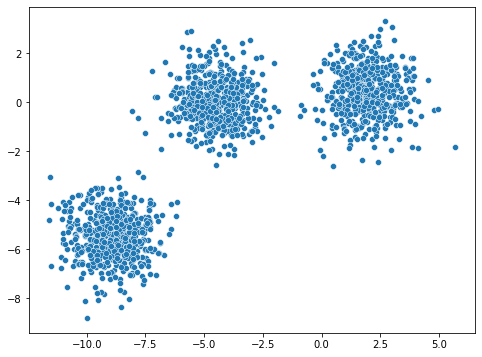

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 1500
random_state = 170
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])

* Ο αλγόριθμος k-means θα δουλέψει άψογα.

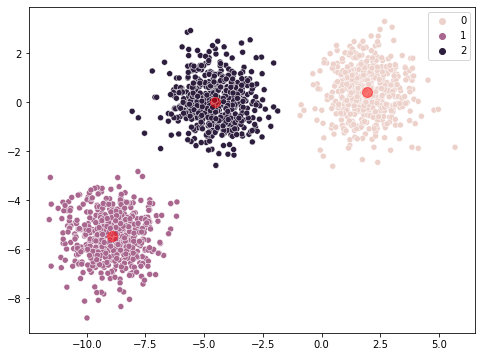

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

* Now let's make the clusters unisitropic

<AxesSubplot:>

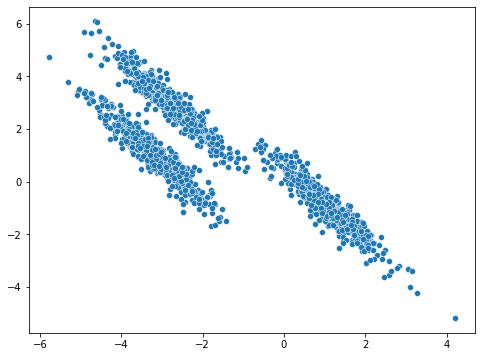

In [3]:
import numpy as np

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1])

* Note that although they are anisotropic, their standard deviations (and thus variances) are not very different.

In [4]:
X_aniso.std(axis=0)

array([2.02019173, 1.86325317])

* However, the results of k-means on this data are far from what we would like.

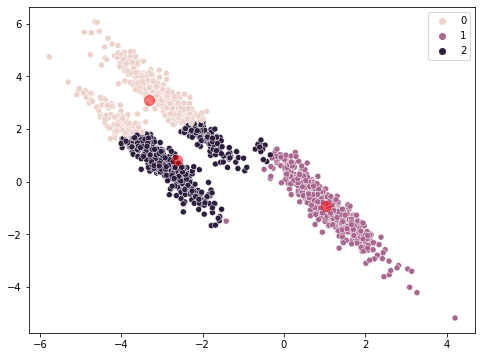

In [5]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso)
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

* And using `StandardScaler` will not change the situation.

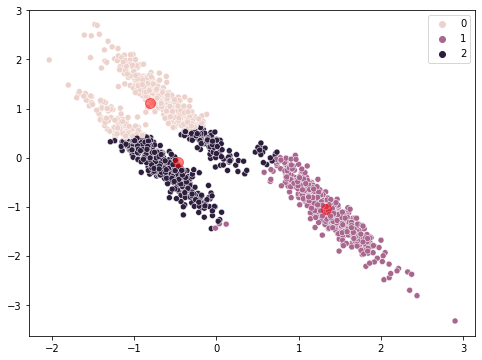

In [6]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_aniso_scaled = standard_scaler.fit_transform(X_aniso)
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso_scaled)
sns.scatterplot(x=X_aniso_scaled[:, 0], y=X_aniso_scaled[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

* In such cases, we can use another clustering algorithm, such as a Gaussian Mixture Model.

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(X_aniso)

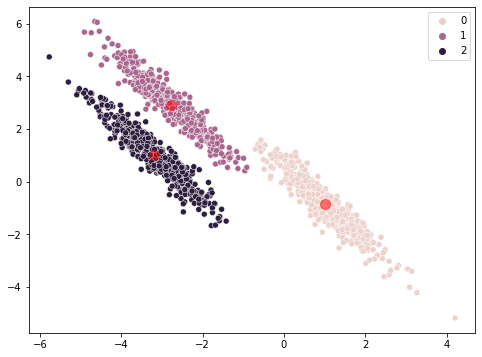

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

* A different kind of problem occurs when the data is not convex.

<AxesSubplot:>

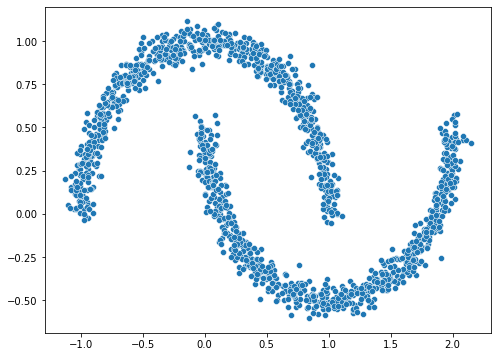

In [9]:
from sklearn.datasets import make_moons

plt.figure(figsize=(8, 6))
X_moons, _ = make_moons(n_samples=1500, noise=.05)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1])

* The k-means algorithm does not work well in this case.

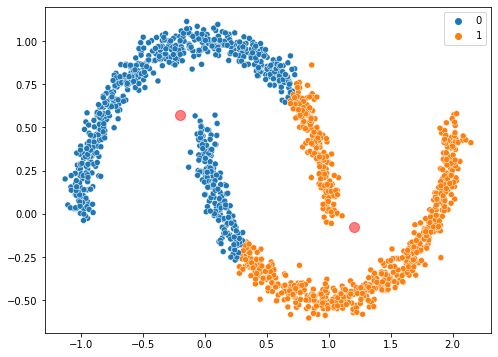

In [10]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred = kmeans.fit_predict(X_moons)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, alpha=0.5)

* Unfortunately, not even a Gaussian Mixture Model.

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(X_moons)

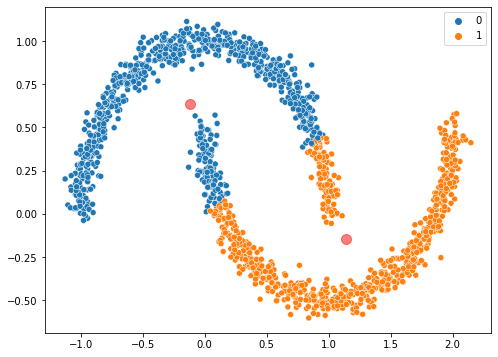

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

* In such cases, we can try another method, spectral clustering.

* The method works by creating a graph, where our observations are the nodes and the links are their neighbors.

* In the code below we get a warning because the graph is not connected, since the two crescents are not connected to each other, which we can ignore.

In [13]:
from sklearn.cluster import SpectralClustering

scm = SpectralClustering(n_clusters=2, 
                         affinity='nearest_neighbors',
                         n_neighbors=10,
                         n_init=20,
                         assign_labels='kmeans',
                         random_state=0)
y_pred = scm.fit_predict(X_moons)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

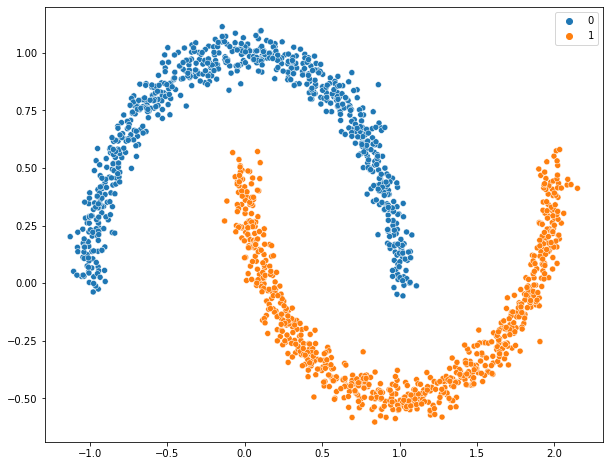

In [14]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)

* scikit-learn offers other clustering methods.

* You can see related documentation at https://scikit-learn.org/stable/modules/clustering.html.